# Assignment-2
Reewa Malik(MDS202134), Deepti Kumawat(MDS202114)


In [1]:
#Importing all the libraries
import time
start = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
import scipy.sparse as ss
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import random


# KOS DATASET

In [2]:
df=pd.read_csv("C:\\Users\\reewa\\Downloads\\docword.kos.txt.gz",sep=" ", header=None,skiprows=[0,1,2])

In [3]:
text=pd.read_csv("C:\\Users\\reewa\\Downloads\\vocab.kos.txt",header=None)
text[0] = text[0].str.lower()

In [4]:
print(text[0])

0             aarp
1          abandon
2        abandoned
3       abandoning
4              abb
           ...    
6901      zimbabwe
6902         zogby
6903        zogbys
6904          zone
6905         zones
Name: 0, Length: 6906, dtype: object


In [5]:
#Stemming for reducing the vocab count
porter_stemmer = PorterStemmer() 
text[0]=text[0].apply(str)
l=list()
for w in text[0]: 
    if(w==porter_stemmer.stem(w)):
     l.append(porter_stemmer.stem(w))
      #print(w, " : ", porter_stemmer.stem(w),":", True)
     
    else:
     l.append(porter_stemmer.stem(w))
     #print(w, " : ", porter_stemmer.stem(w),":", False)
text[1]=l     

text_1 = text.drop_duplicates([1], keep='first')#keep only one first copy of same words obtained through stemming

In [6]:
text_1#we can see the word count is reduced

,0,1
0,aarp,aarp
1,abandon,abandon
4,abb,abb
5,abc,abc
7,abdullah,abdullah
...,...,...
6899,zarqawi,zarqawi
6900,zell,zell
6901,zimbabwe,zimbabw
6902,zogby,zogbi


In [7]:
#getting the current word ids from vocab.txt
idx=list()
for i in range(len(text_1)):
    idx.append(text_1.index[i])
incremented_idx = [z+1 for z in idx]
incremented_idx

[1,
 2,
 5,
 6,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 33,
 34,
 35,
 37,
 40,
 45,
 46,
 48,
 51,
 54,
 56,
 57,
 58,
 61,
 63,
 66,
 70,
 72,
 73,
 75,
 76,
 78,
 80,
 85,
 88,
 89,
 93,
 94,
 95,
 99,
 100,
 104,
 106,
 108,
 110,
 111,
 117,
 118,
 121,
 122,
 123,
 124,
 126,
 128,
 130,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 151,
 152,
 155,
 157,
 159,
 162,
 163,
 164,
 165,
 166,
 167,
 171,
 174,
 175,
 176,
 177,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 206,
 207,
 208,
 209,
 210,
 212,
 214,
 215,
 218,
 219,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 242,
 243,
 244,
 245,
 246,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 256,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 270,
 271,
 272,
 273,
 2

In [8]:
a=set(incremented_idx)
b=set(range(28102))
remove_index=b.difference(a)
fin=list(remove_index)
fin.remove(0)
df=df[df[1].isin(fin) == False]
df.columns = ['doc_id', "word_id", "freq"]
df

,doc_id,word_id,freq
0,1,61,2
1,1,76,1
2,1,89,1
4,1,296,1
6,1,404,1
...,...,...,...
353154,3430,6296,1
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1


In [9]:
df.set_index('word_id')
col_nam=df["doc_id"]


In [10]:
table = pd.pivot_table(df, values ='freq', index ="doc_id",
                         columns ="word_id",fill_value=0)
table#Storing document Id's in rows and word Id's in columns

word_id,1,2,5,6,8,9,10,11,13,14,...,6895,6896,6897,6898,6899,6900,6901,6902,6903,6905
doc_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tab=table.to_numpy()
tab

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
def jaccard(tab):
    #table_1=table.to_numpy() #converting into a numpy array
    mat_1=ss.csc_matrix(tab) #sparse column matrix to calculate jaccard distance
    jacc_index = pairwise_distances(mat_1.toarray(), metric='jaccard')
    return(jacc_index)
    

In [13]:
jac_mat=jaccard(tab)
jac_mat

C:\Users\reewa\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.9122807 , 0.95402299, ..., 0.95901639, 0.975     ,
        0.96774194],
       [0.9122807 , 0.        , 0.92537313, ..., 0.97701149, 0.96341463,
        0.96551724],
       [0.95402299, 0.92537313, 0.        , ..., 0.95744681, 0.96376812,
        0.97222222],
       ...,
       [0.95901639, 0.97701149, 0.95744681, ..., 0.        , 0.68656716,
        0.96666667],
       [0.975     , 0.96341463, 0.96376812, ..., 0.68656716, 0.        ,
        0.69117647],
       [0.96774194, 0.96551724, 0.97222222, ..., 0.96666667, 0.69117647,
        0.        ]])

In [14]:
#finding the doc_id of centroids randomly selected centroids
def centroids(tab,k):
    random.seed(42)
    centroids_list=[]
    centroids_list=random.sample(list(range(len(tab))),k)
    return(centroids_list)

In [15]:
centroids_list = centroids(tab,4)
centroids_list

[2619, 456, 102, 3037]

In [17]:
#finding distance of all the documents with a centroid
def clusters_centroids(centroid_id):
    dist_list=[]
    for j in range(len(jac_mat)):
                dist_list.append(jac_mat[centroid_id][j])
    return(dist_list)

In [18]:
def kmeans(tab,jac_mat,k=4,max_iter=15):
    centroids_list=centroids(tab,k)
    count=0
    for ite in range(max_iter):
        new_df=pd.DataFrame()
        count=count+1
        for i in centroids_list:
            new_df[i]=clusters_centroids(i)
        new_df['Centroid_ID']=new_df.idxmin(axis=1)
    
        cent_doc_id=new_df.groupby("Centroid_ID").groups#telling which doc id corr to which cluster
        cent_unique_id=list(new_df["Centroid_ID"].unique())
        cent_up=[]
        for j in cent_unique_id:
            col_sum = list(pd.DataFrame(jac_mat).loc[cent_doc_id[j],cent_doc_id[j]].sum(axis=1))
            y = cent_doc_id[j][col_sum.index(min(col_sum))]
            cent_up.append(y)
        
        for i in range(k):
            if ite!=max_iter-1:
                centroids_list[i]=cent_up[i]
    return(cent_doc_id)

In [19]:
kmeans(tab,jac_mat,k=3,max_iter=9)

{2276: [13, 16, 17, 36, 55, 56, 110, 161, 187, 188, 235, 236, 237, 240, 248, 285, 326, 386, 392, 399, 437, 467, 483, 495, 503, 538, 552, 569, 616, 632, 671, 706, 717, 780, 791, 794, 798, 800, 813, 816, 824, 834, 846, 851, 857, 867, 879, 889, 890, 901, 912, 926, 928, 933, 936, 945, 956, 969, 979, 982, 990, 1001, 1011, 1023, 1034, 1036, 1037, 1044, 1049, 1053, 1060, 1072, 1084, 1095, 1097, 1098, 1099, 1108, 1120, 1132, 1139, 1142, 1143, 1156, 1160, 1169, 1174, 1181, 1191, 1193, 1194, 1206, 1218, 1226, 1228, 1240, 1251, 1263, 1274, 1278, ...], 2728: [2, 5, 10, 11, 12, 20, 23, 34, 42, 44, 57, 63, 68, 70, 79, 89, 99, 111, 112, 125, 128, 135, 140, 147, 148, 150, 151, 152, 159, 162, 174, 186, 193, 202, 211, 216, 217, 219, 230, 232, 241, 243, 251, 261, 271, 278, 280, 288, 291, 296, 301, 306, 310, 320, 330, 333, 342, 352, 364, 365, 376, 380, 387, 397, 408, 409, 418, 421, 435, 445, 446, 448, 457, 459, 468, 480, 492, 504, 515, 528, 536, 539, 546, 565, 568, 579, 580, 592, 602, 605, 618, 628, 641, 

In [20]:
def kmean_inertia(data, jm,k=5,max_iter=10):
        cent_doc_id=kmeans(data,jm,k,max_iter)
        x = 0
        l=[]
        for i in list(cent_doc_id.keys()):
            for j in list(cent_doc_id[i]):
                l.append(jac_mat[i,j]**2)
                x += sum(l)
        return (x/k)
def optimize(data,jm,m,max_iter=30):
    x = []
    for i in range(1,m):
        x.append(kmean_inertia(data,jm,k=i,max_iter=30))
    return x

In [21]:
kmean_inertia(tab,jac_mat,k=10,max_iter=30)#finding inertia for different values of k

478774.00875780854

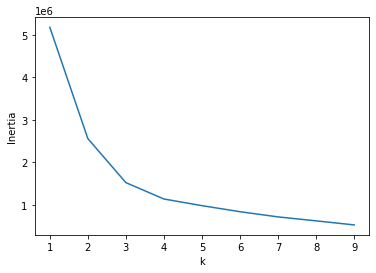

In [22]:
y=optimize(tab,jac_mat,10,max_iter=30)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.plot(list(range(1,10)),y)

In [23]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 241.7830240726471 seconds
